___
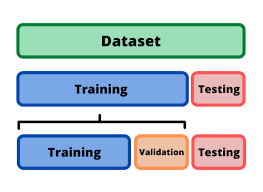


# <font color= #8A0829> Data modelling lab </font>

- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year: </Strong>: 2023
- <Strong> Teacher email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Topic: Train and validation</font>

It works when you have enough data to train the model after making train-test split

**What to do if you don't have enough data**

K-fold cross-validation is an alternative process


**So... when to use train-test split**

- Is not expensive to train the model
- When we have a lot of data
- If we need to estimate the performance rapidly

#### <font color= #2E9AFE> Configuration</font>


Most common separations
- Train: 80%, Test: 20%
- Train: 70%, Test: 30%
- Train: 50%, Test: 50%


In [28]:

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create fake data
X, y = make_blobs(n_samples=1000, n_features=1)

In [29]:
datos = pd.DataFrame(np.column_stack((X,y)), columns=['X','y'])
datos.head()

,X,y
0,1.973913,1.0
1,0.061871,1.0
2,1.332130,1.0
3,-7.755680,0.0
4,6.652412,2.0


In [30]:
datos.y.value_counts()

0.0    334
1.0    333
2.0    333
Name: y, dtype: int64

In [31]:
#Data shape
datos.shape

(1000, 2)

In [32]:
# Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


print("Tamaño de X entrenamiento:",X_train.shape)
print("Tamaño de X prueba:",X_test.shape)
print("Tamaño de y entrenamiento:",y_train.shape)
print("Tamaño de y prueba:",y_test.shape)


Tamaño de X entrenamiento: (700, 1)
Tamaño de X prueba: (300, 1)
Tamaño de y entrenamiento: (700,)
Tamaño de y prueba: (300,)


In [33]:
X_train[:5,:]

array([[ 2.3078646 ],
       [-7.12754711],
       [-7.48137537],
       [ 4.67805697],
       [ 5.02282727]])

In [34]:
# Train test split with seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Tamaño de X entrenamiento:",X_train.shape)
print("Tamaño de X prueba:",X_test.shape)
print("Tamaño de y entrenamiento:",y_train.shape)
print("Tamaño de y prueba:",y_test.shape)


Tamaño de X entrenamiento: (700, 1)
Tamaño de X prueba: (300, 1)
Tamaño de y entrenamiento: (700,)
Tamaño de y prueba: (300,)


In [35]:
X_train[:5,:]

array([[-5.01134647],
       [-5.01404106],
       [ 0.04167644],
       [-0.06805508],
       [ 0.04115285]])

#### <font color= #2E9AFE> Stratified split</font>

**For classification problems**


Most classification problems don't have a balanced amount of data for each class
Therefore, it's desirable to split the data in a way it keeps the same data proportion of each class from the original dataset
 
That's when we used stratified split

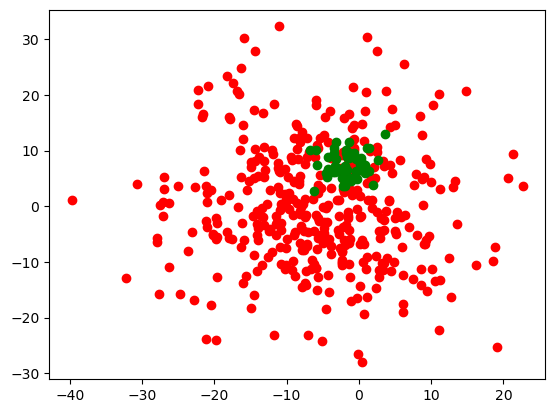

In [36]:
#Creating imbalanced data
X, y = make_blobs(n_samples=[400,50], centers=None, cluster_std=[10.0, 2],random_state=22,n_features=2)

Zero0=np.where(y == 0)[0]
One1=np.where(y == 1)[0]

plt.scatter(X[Zero0,0],X[Zero0,1],color=['red'])
plt.scatter(X[One1,0],X[One1,1],color=['green'])
plt.show()

In [37]:
pd.DataFrame(X)

,0,1
0,-13.661564,-1.570388
1,7.690015,3.856342
2,-0.408269,4.988843
3,-5.948700,18.126090
4,-19.680768,-12.701575
...,...,...
445,0.214123,1.783123
446,-7.858724,-7.849664
447,-22.276086,18.375550
448,-3.814042,-8.658855


In [38]:
y.shape

(450,)

In [39]:
data = pd.DataFrame(np.column_stack((X,y)), columns=['X1','X2','y'])
data.head()

,X1,X2,y
0,-13.661564,-1.570388,0.0
1,7.690015,3.856342,0.0
2,-0.408269,4.988843,0.0
3,-5.948700,18.126090,0.0
4,-19.680768,-12.701575,0.0


In [40]:
data['y'].value_counts()

0.0    400
1.0     50
Name: y, dtype: int64

<Axes: ylabel='y'>

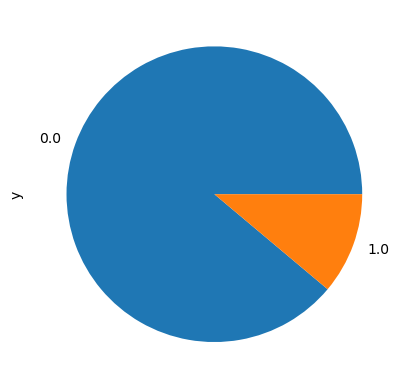

In [41]:
# Percentage of dfferent classes
data['y'].value_counts().plot(kind='pie')

We want our train test split to have the same class distribution

In [42]:
# Spliting the data with stratify parameter=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [43]:
#How many distinct classes do we have in y_train?
pd.DataFrame(y_train).value_counts()

0    280
1     35
dtype: int64

<Axes: >

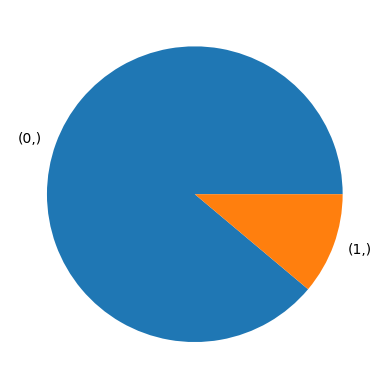

In [44]:
pd.DataFrame(y_train).value_counts().plot(kind='pie')

<Axes: >

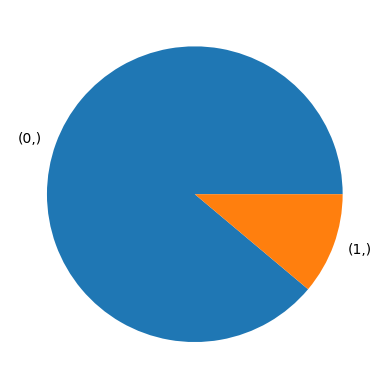

In [45]:
#How many distinct classes do we have in y_test?
pd.DataFrame(y_test).value_counts().plot(kind='pie')

### <font color= #2E9AFE> Train-test split for machine learning models</font>

#### <font color= blue> Clasificaction</font>

In [46]:
#Load data
data = pd.read_csv('glass.data',header=None)
names = ['ID','Indice_Refraccion','Na','Mg','Al','Si','K', 'Ca','Ba','Fe','Tipo_Vidrio']
data.columns = names

#Separate x and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [47]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
data.shape

(214, 11)

In [49]:
#How many distinct classes does objective variables has?
data.Tipo_Vidrio.value_counts(normalize=True)

2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: Tipo_Vidrio, dtype: float64

In [50]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46, stratify=y)



print("Tamaño de X entrenamiento:",X_train.shape)
print("Tamaño de X prueba:",X_test.shape)
print("Tamaño de y entrenamiento:",y_train.shape)
print("Tamaño de y prueba:",y_test.shape)

Tamaño de X entrenamiento: (149, 10)
Tamaño de X prueba: (65, 10)
Tamaño de y entrenamiento: (149,)
Tamaño de y prueba: (65,)


In [51]:
# y_train distribution
y_train.value_counts(normalize=True)

2    0.355705
1    0.328859
7    0.134228
3    0.080537
5    0.060403
6    0.040268
Name: Tipo_Vidrio, dtype: float64

In [52]:
# y_test distribution
y_test.value_counts(normalize=True)

2    0.353846
1    0.323077
7    0.138462
3    0.076923
5    0.061538
6    0.046154
Name: Tipo_Vidrio, dtype: float64

In [53]:
#Adjust logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

#Prediction with test data-> y^
pred = model.predict(X_test)

#Evaluating predictions against real data
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %3f' %accuracy)


Accuracy: 0.984615


/Users/octavioperezurbina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <font color= blue> Regression</font>

**Which are the disadvantages of using train-test split to evaluate model performance?**

It gives us a high variance estimation because if we change the seed the model, the performance will significantly change



In [54]:
#libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [55]:
iris = load_iris()

# X and Y
X=iris.data
y=iris.target

In [56]:
pd.DataFrame(iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
#Train-test split with random values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4) #2 #7


#Test acurracy for KNeighbors
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.974


**Pregunta:** Qué pasaría si dividiéramos los datos muchas veces de distintas maneras, calculando la presición para cada partición y finalmente promediando los resultados?

**Question** What would happen if we split the data several times, calculating the acurracy and averaging the results

**Answer** cross validation

**Another question** Does feature selection should be done before or after split


In [58]:
#Feture selection before spliting data

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# random data
np.random.seed(1)
X = np.random.randn(500, 10000) #500 rows, 10000 columns
y = np.random.choice(2, size=500)

In [59]:
#Selecting best 25 variables using ANOVA test
selector = SelectKBest(k=25) 

X_selected = selector.fit_transform(X,y)

#Spliting
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Adjusting regression
lr = LogisticRegression()
lr.fit(X_selected_train,y_train)

# Predict and get data
y_pred = lr.predict(X_selected_test)
accuracy_score(y_test, y_pred)

0.76

We got a good 0.76 precission... but me made a basic mistake, test data has already been seen by the model when we used: 
**X_selected = selector.fit_transform(X,y)**

Let's see how our model performs when given new data

In [60]:


#Creating new data for our model
X_new = np.random.randn(500, 10000)
y_new = np.random.choice(2, size=500)


#Select same variables
X_new_selected = selector.transform(X_new)

#Predict and get accuracy
y_new_pred = lr.predict(X_new_selected)
accuracy_score(y_new, y_new_pred)

0.506

So... We split and then select variables

In [61]:
#The correct way to choose featues is first spliting then choosing

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Select best features based on train
selector = SelectKBest(k=25)
X_train_selected = selector.fit_transform(X_train,y_train)

# Adjust logistic regression
lr.fit(X_train_selected,y_train)

# Select most important columns and used them in x_test
X_test_selected = selector.transform(X_test)
y_pred = lr.predict(X_test_selected)
accuracy_score(y_test, y_pred)


0.496

In [62]:
#Model performance with new data

X_new_selected = selector.transform(X_new)

y_new_pred = lr.predict(X_new_selected)
accuracy_score(y_new, y_new_pred)

0.526

### <font color= #2E9AFE> K-Fold Cross Validation</font>

#### Steps

1. Divide data en K folds
2. We use fold 1 as test data and the remaining folds as train data
3. We calculate accuracy
4. We repeat step 2,3 using different test folds
5. We get average accuracy


In [63]:
#Simulating dividing in 5 folds data with 25 rercods
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]


TRAIN: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344


- A fold cannot be in test and train at the same time


**Comparando train/test split vs. Cross-Validation**

Cross validation dvantages:
- More precise accuracy information out of test sample
- More efficiente use of data

train/test split advantages:
- Runs K times faster than K-fold cross-validation
- Easier to examinate detailed results of the process

**Recomendations**

- K = 10 reccomended
- For classification models, stratified sampling is reccomended



### Example: model selection

Compare best KNN model versus logistic regression

In [64]:
#10-fold cross-validation with best KNN model

#KNN
from sklearn.model_selection import cross_val_score
#Intialize model
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.514


In [65]:
#10-fold cross-validation with logistic regression
logistic = LogisticRegression()
print(cross_val_score(logistic, X, y, cv=10, scoring='accuracy').mean())

0.51


KNN is better model fot this data

### Example: FEature selection

Regression model


In [66]:
#cargar datos
ad = pd.read_csv('Advertising.csv')
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [67]:
#3 variablke list
cols = ['TV', 'Radio','Newspaper']

# Split X and y
X = ad[cols]
y=ad.Sales

In [68]:
#10 fold cross validation with 3 variables for lineal regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Model
lm=LinearRegression()

#Cross validation
scores = cross_val_score(lm, X,y, cv=10,  scoring='neg_root_mean_squared_error') #cross_val_score(model, X,y, cv=folds,  scoring='metric')

print(scores*-1)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [69]:
rmse = scores*-1

In [70]:
#RMSE --> MSE
print(rmse.mean())

1.6913531708051799


In [71]:
#10 fold cross validation with 2 variables without newspapes
cols = ['TV', 'Radio']

#Separar X y Y
X = ad[cols]
y=ad.Sales

print( (-cross_val_score(lm, X,y, cv=10,  scoring='neg_root_mean_squared_error')).mean())


1.6796748419090766


Because RMSE is a metric we want to lower, the model without using "newspaper" variable is better

#### Non manual feature selection


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
np.random.seed(6450345)

In [73]:

#First we select variables, then train the model
#Data creation
def make_data(N=1000, n_vars=10,
              n_classes=2):
    X = np.random.normal(size=(N,n_vars))
    y = np.random.choice(n_classes, N)
    
    return X, y

X,y = make_data(N=2000, n_vars=50000)


# Select 20 features with most correlation
select = SelectKBest(f_regression, k=20)
X_selected = select.fit_transform(X,y)

#Create model
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X_selected, y, cv=5)

print ("Scores on each subset:")
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

Scores on each subset:
[0.6025 0.63   0.625  0.63   0.6325]
Average score and uncertainty: (62.40 +- 0.493)%


In [74]:
#HOW ITS DONE
#Split train test in each fold
#select variables

from sklearn.pipeline import make_pipeline

clf = make_pipeline(SelectKBest(f_regression, k=20),
                    GradientBoostingClassifier())

scores = cross_val_score(clf, X, y, cv=5)

print("Scores on each subset:")
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

Scores on each subset:
[0.5325 0.4975 0.525  0.465  0.53  ]
Average score and uncertainty: (51.00 +- 1.151)%


### References

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html